<a href="https://colab.research.google.com/github/nb20593/data-science/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning packages import

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from matplotlib import pyplot as plt

In [2]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Load dataset from githhub repository

In [3]:
irony_train_label_data = pd.read_csv('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_labels.txt')
irony_train_text_data = pd.read_fwf('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_text.txt')
sentiment_train_label_data =pd.read_csv('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_labels.txt')
sentiment_train_text_data =pd.read_fwf('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_text.txt')
offensive_train_label_data = pd.read_csv('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_labels.txt')
offensive_train_text_data = pd.read_fwf('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_text.txt')

# verify the shapes of the datasets

In [4]:
print(irony_train_label_data.shape)
print(irony_train_text_data.shape)
print(sentiment_train_label_data.shape)
print(sentiment_train_text_data.shape)
print(offensive_train_label_data.shape)
print(offensive_train_text_data.shape)

(2861, 1)
(2861, 1)
(45614, 1)
(45614, 2)
(11915, 1)
(11915, 51)


Remove unwanted columns

In [5]:
sentiment_train_text_data.head()
sentiment_train_text_data.columns
sentiment_train_text_data = sentiment_train_text_data.drop(sentiment_train_text_data.columns[1], axis = 1)
offensive_train_text_data = offensive_train_text_data.drop(offensive_train_text_data.columns[1:], axis = 1)
print(sentiment_train_text_data.shape)
print(offensive_train_text_data.shape)

(45614, 1)
(11915, 1)


merge the label dataset and text dataset

In [6]:
#sentiment dataset
df = sentiment_train_text_data.join(sentiment_train_label_data)
df.columns = ['text','label']
df.head(5)

#irony dataset
df_irony = irony_train_text_data.join(irony_train_label_data)
df_irony.columns = ['text','label']
df_irony.head(5)

#offensive dataset
df_offensive = offensive_train_text_data.join(offensive_train_label_data)
df_offensive.columns = ['text','label']
df_offensive.head(5)

,text,label
0,@user Eight years the republicans denied obama...,1
1,@user Get him some line help. He is gonna be j...,0
2,@user @user She is great. Hi Fiona!,0
3,@user She has become a parody unto herself? Sh...,1
4,@user @user @user @user @user @user @user @use...,0


plot histogram for the dataset

sentiment_positive_count : 17848
sentiment_neutral_count : 20673
sentiment_negative_count : 7093


<function matplotlib.pyplot.show>

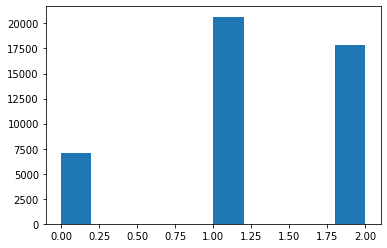

In [7]:
#sentiment dataset
positive = df['label'][df.label == 2]
neutral = df['label'][df.label == 1]
negative = df['label'][df.label == 0]
print ('sentiment_positive_count :',len(positive))
print ('sentiment_neutral_count :',len(neutral))
print ('sentiment_negative_count :',len(negative))

plt.hist([df.label])
plt.show

<function matplotlib.pyplot.show>

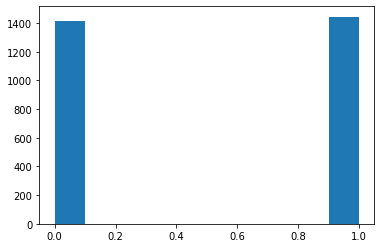

In [8]:
#irony dataset
non_irony =  df_irony['label'][df_irony.label ==0]
irony = df_irony['label'][df_irony.label == 1]
plt.hist([df_irony.label])
plt.show

<function matplotlib.pyplot.show>

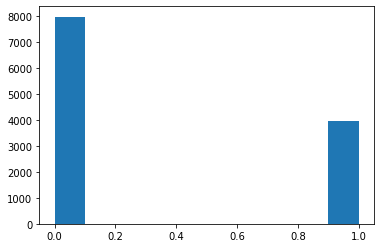

In [9]:
#offensive dataset
not_offensive = df_offensive['label'][df_offensive.label ==0]
offensive = df_offensive['label'][df_offensive.label == 1]
plt.hist([df_offensive.label])
plt.show

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


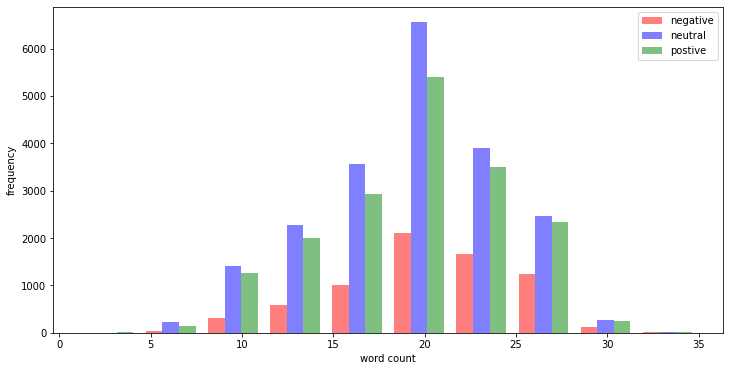

In [10]:
# sentiment dataset
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['text'].apply(word_count)
df.head(3)

x = df['word count'][df.label == 0]
y = df['word count'][df.label == 1]
z = df['word count'][df.label == 2]
plt.figure(figsize=(12,6))
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y,z], color=['r','b','g'], alpha=0.5, label=['negative','neutral','postive'])
plt.legend(loc='upper right')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


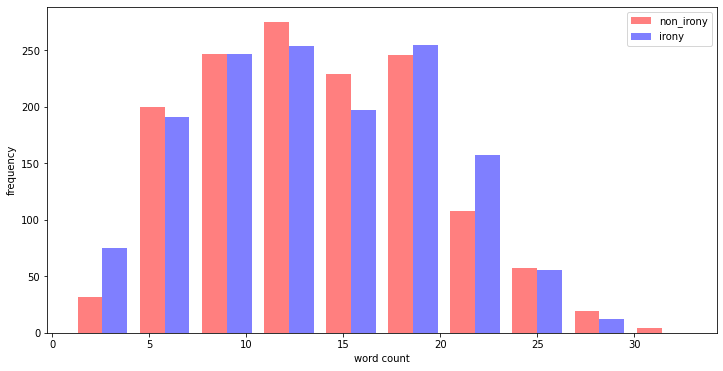

In [11]:
#irony word count
df_irony['word count'] = df_irony['text'].apply(word_count)
df_irony.head(3)

x = df_irony['word count'][df_irony.label == 0]
y = df_irony['word count'][df_irony.label == 1]
plt.figure(figsize=(12,6))
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['non_irony','irony'])
plt.legend(loc='upper right')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


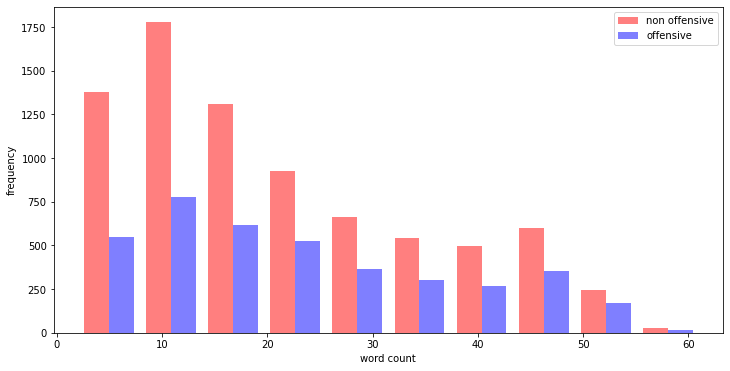

In [12]:
#offensive word count
df_offensive['word count'] = df_offensive['text'].apply(word_count)
df_offensive.head(3)

x = df_offensive['word count'][df_offensive.label == 0]
y = df_offensive['word count'][df_offensive.label == 1]
plt.figure(figsize=(12,6))
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['non offensive','offensive'])
plt.legend(loc='upper right')

Most frequent words

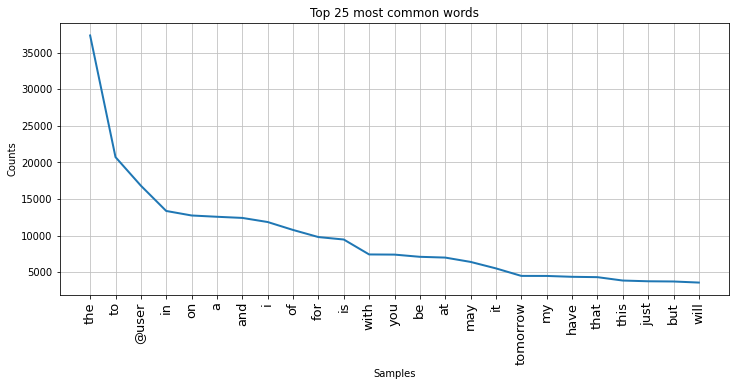

In [13]:
from collections import Counter
all_words = []
for line in list(df['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

Expand contractions

In [14]:
 contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

#apply expand contractions to three datasets
df['text']=df['text'].apply(lambda x:expand_contractions(x))
df_irony['text'] = df_irony['text'].apply(lambda x:expand_contractions(x))
df_offensive['text'] = df_offensive['text'].apply(lambda x:expand_contractions(x))

pre processing

In [15]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove digits
    tweet = re.sub(r'\w*\d\w*','', tweet)
    #Remove puntuation
    tweet = re.sub(r'[%s]' % re.escape(string.punctuation), '', tweet)
    #Remove extra spaces
    tweet = re.sub(' +',' ',tweet)
    return tweet

In [16]:
#sentiment dataset
df['new_text_column'] = df['text'].apply(processTweet)
#df = df.drop(df.columns[3], axis = 1)
df

#irony dataset
df_irony['new_text_column'] = df_irony['text'].apply(processTweet)
df_irony

#offensive dataset
df_offensive['new_text_column'] = df_offensive['text'].apply(processTweet)
df_offensive

,text,label,word count,new_text_column
0,@user Eight years the republicans denied obama...,1,17,eight years the republicans denied obama’s pic...
1,@user Get him some line help. He is gonna be j...,0,44,get him some line help he is gonna be just fin...
2,@user @user She is great. Hi Fiona!,0,7,she is great hi fiona
3,@user She has become a parody unto herself? Sh...,1,32,she has become a parody unto herself she has c...
4,@user @user @user @user @user @user @user @use...,0,45,this is the vetsresistsquadron is bullshit the...
...,...,...,...,...
11910,@user I wonder if they are sex traffic victims?,1,9,i wonder if they are sex traffic victims
11911,@user Do we dare say he is... better than Nyjer?,0,10,do we dare say he is better than nyjer
11912,@user No idea who he is. Sorry,0,7,no idea who he is sorry
11913,#Professor Who Shot Self Over Trump Says Gun C...,0,13,who shot self over trump says gun control was ...


word count after preprocessing

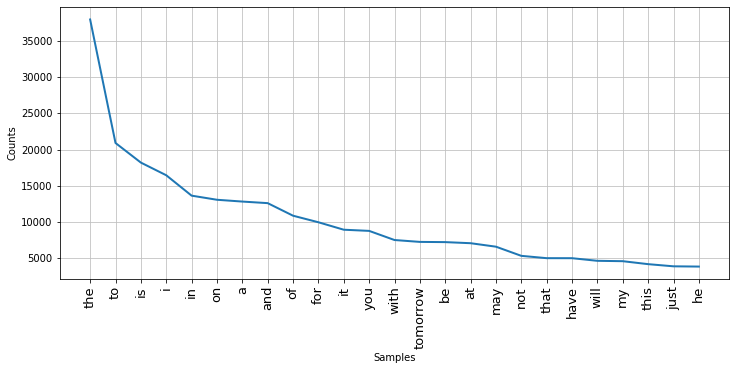

In [17]:
all_words = []
for line in list(df['new_text_column']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

Lemmatization and removing stopwords

In [18]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['new_text_column'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_irony['lemmatized']=df_irony['new_text_column'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_offensive['lemmatized']=df_offensive['new_text_column'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [19]:
df

,text,label,word count,new_text_column,lemmatized
0,"""Ben Smith / Smith (concussion) remains out of...",1,14,ben smith smith concussion remains out of the ...,ben smith smith concussion remain lineup thurs...
1,Sorry bout the stream last night I crashed out...,1,24,sorry bout the stream last night i crashed out...,sorry bout stream night crash tonight sure min...
2,Chase Headley is RBI double in the 8th inning ...,1,23,chase headley is rbi double in the inning off ...,chase headley rbi double inning david price sn...
3,@user Alciato: Bee will invest 150 million in ...,2,21,alciato bee will invest million in january ano...,alciato bee invest million january summer plan...
4,@user LIT MY MUM 'Kerry the louboutins I wonde...,2,17,lit my mum kerry the louboutins i wonder how m...,lit mum kerry louboutin wonder willam own look...
...,...,...,...,...,...
45609,"@user \""""So amazing to have the beautiful Lady...",2,19,so amazing to have the beautiful lady gaga at ...,amazing beautiful lady gaga ac tonight love gi...
45610,"9 September has arrived, which means Apple is ...",2,19,september has arrived which means apple is ne...,september arrive mean apple new iphone hour ...
45611,Leeds 1-1 Sheff Wed. Giuseppe Bellusci securin...,2,17,leeds sheff wed giuseppe bellusci securing a p...,leeds sheff would giuseppe bellusci secure poi...
45612,@user no I am in hilton head till the 8th lol ...,1,21,no i am in hilton head till the lol go to jaso...,hilton head till lol jason aldean sept alot go


Tokenize and removing stopwords,punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


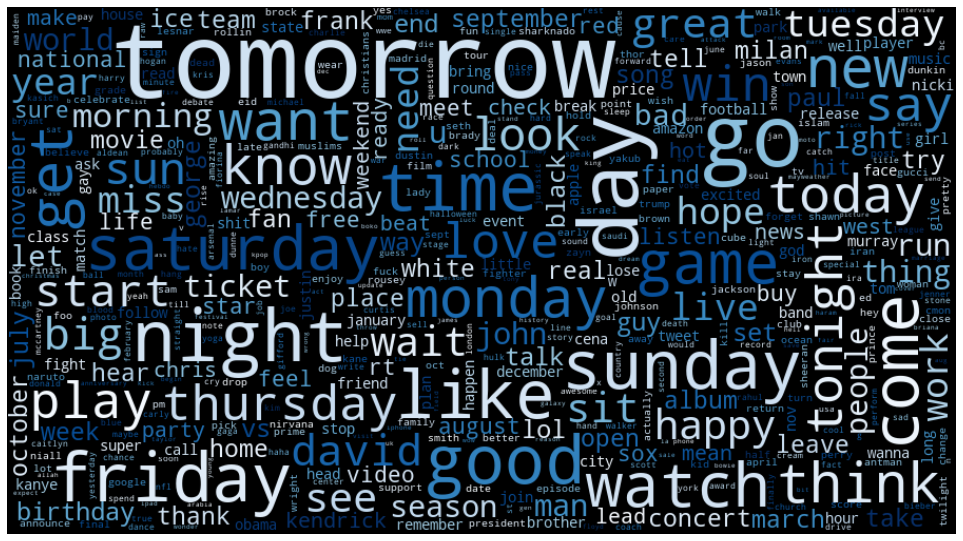

In [20]:
import nltk
nltk.download('stopwords')
def text_process(raw_text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

df['tokens'] = df['lemmatized'].apply(text_process)
df_irony['tokens'] = df_irony['lemmatized'].apply(text_process)
df_offensive['tokens'] = df_offensive['lemmatized'].apply(text_process)

from collections import Counter
from wordcloud import WordCloud
all_words = []
for line in df['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

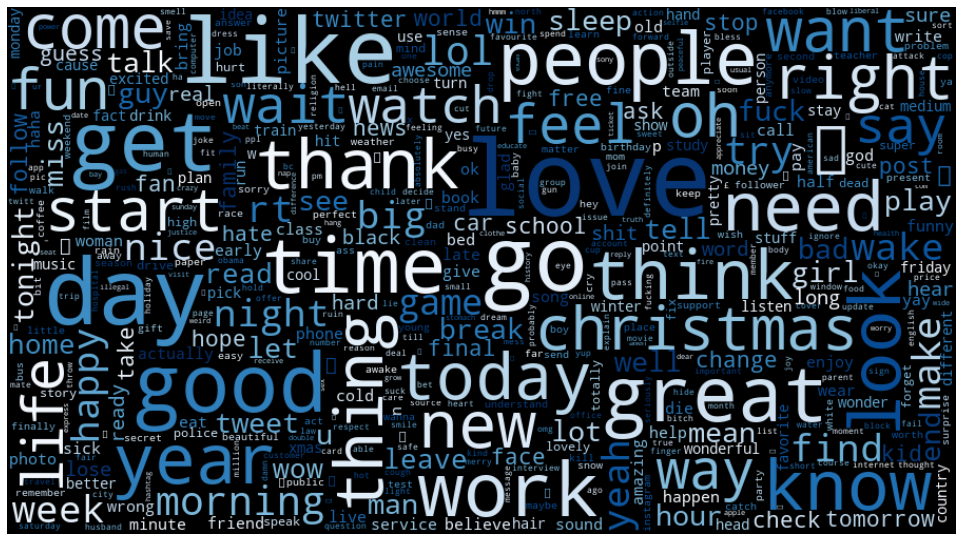

In [21]:
all_words = []
for line in df_irony['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

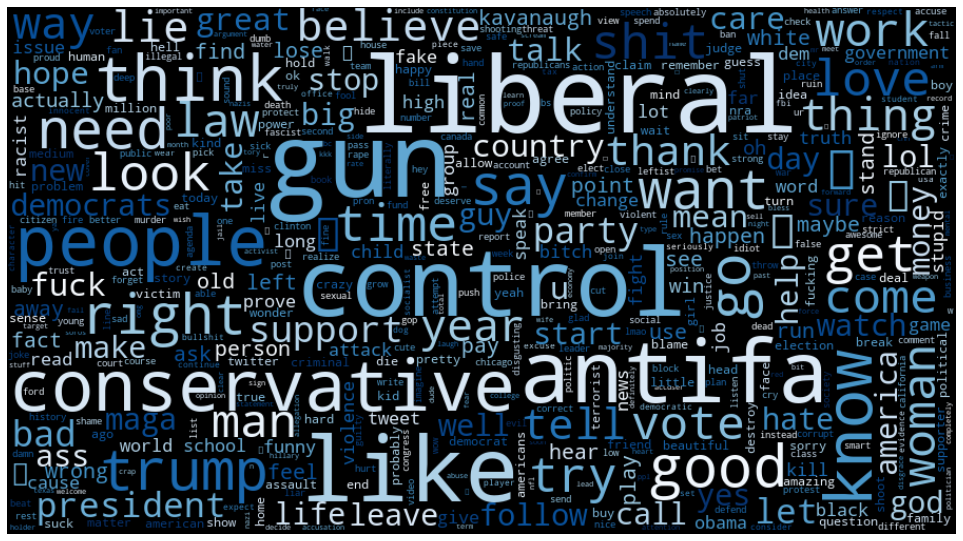

In [22]:
all_words = []
for line in df_offensive['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()